# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\tanzi\\Desktop\\project_tc\\project_tc\\project_tc\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\tanzi\\Desktop\\project_tc\\project_tc\\project_tc'

# Section 1

Section 1 content

In order to run this notebook, you need to have the following libraries installed:  
- pandas
- numpy
- matplotlib
- seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import Cleaned Data
The transformed dataset is now ready for analysis and visualization and with following code, it is imported.

In [26]:
df = pd.read_csv(r'dataset\processed\Online_Retail_Cleaned.csv')
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Date,Time,Sales,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,2010-12-01,08:26:00,15.30,2010-12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,20.34,2010-12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,2010-12-01,08:26:00,22.00,2010-12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,20.34,2010-12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,2010-12-01,08:26:00,20.34,2010-12,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,2011-12-09,12:50:00,10.20,2011-12,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,2011-12-09,12:50:00,12.60,2011-12,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,2011-12-09,12:50:00,16.60,2011-12,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,2011-12-09,12:50:00,16.60,2011-12,Friday


Here is the plot of the total sales per month of the store:


In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_Sale = df.groupby('Month')['Sales'].sum().reset_index()
monthly_Sale

,Month,Sales
0,2010-12,748957.020
1,2011-01,560000.260
2,2011-02,498062.650
3,2011-03,683267.080
4,2011-04,493207.121
5,2011-05,723333.510
6,2011-06,691123.120
7,2011-07,681300.111
8,2011-08,682680.510
9,2011-09,1019687.622


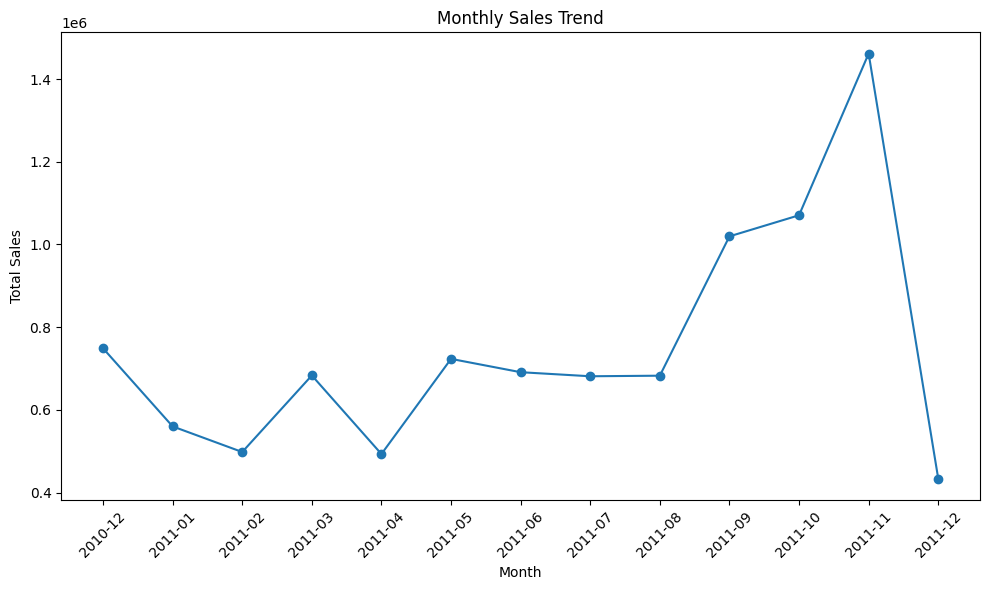

In [28]:


plt.figure(figsize=(10, 6))
plt.plot(monthly_Sale['Month'].astype(str), monthly_Sale['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total Sales per country

In [29]:
# Total sales per country
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
country_sales

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

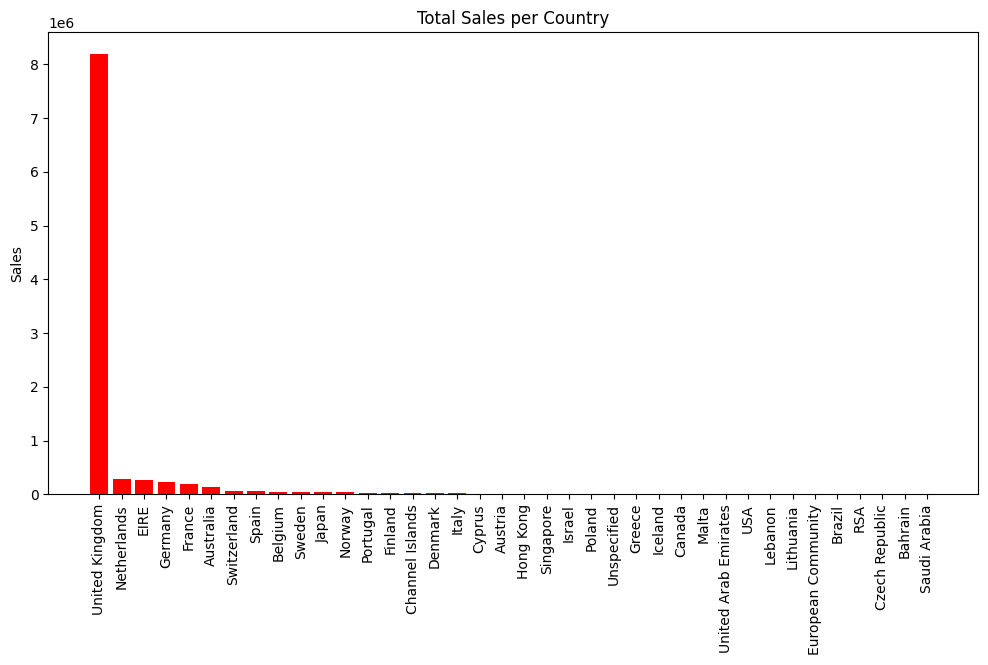

In [30]:


plt.figure(figsize=(12,6))
plt.bar(country_sales.index, country_sales.values, color='red')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.title('Total Sales per Country')
plt.show()

---

Top 10 Products by Quantity Sold

In [31]:
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)
top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
Name: Quantity, dtype: int64

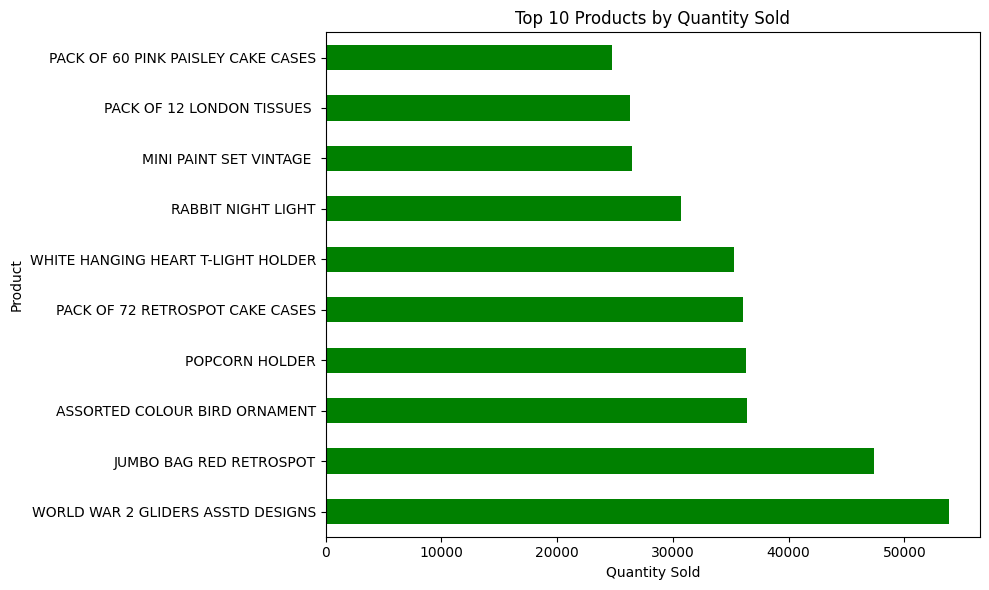

In [32]:
plt.figure(figsize=(10, 6))
top_products.plot(kind='barh', color='green')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

Frequency of Customer Purchases

with customer ID and purchase frequency it can be ploted in horizontal lines.


In [33]:
customer_freq = df.groupby('CustomerID').size()
customer_freq


CustomerID
12346      2
12347    182
12348     31
12349     73
12350     17
        ... 
18280     10
18281      7
18282     13
18283    756
18287     70
Length: 4372, dtype: int64

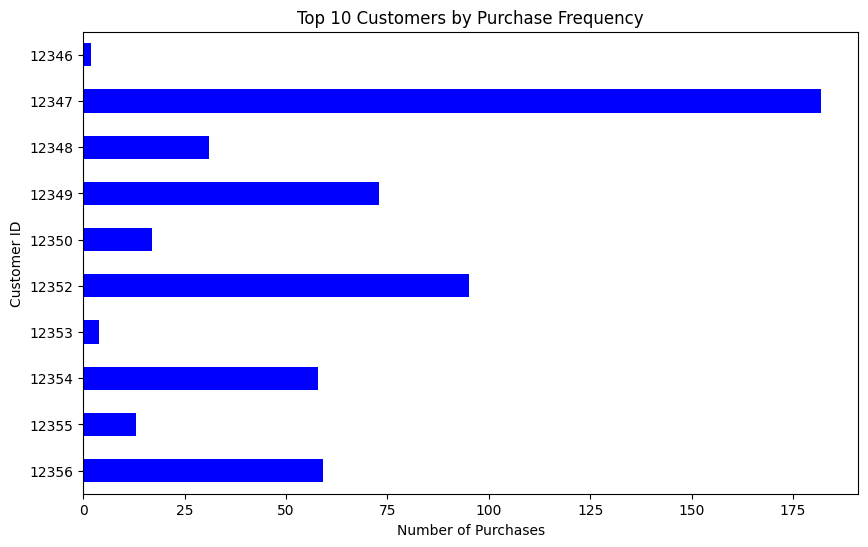

In [34]:
plt.figure(figsize=(10,6))
customer_freq.head(10).plot(kind='barh', color='blue')  # Top 10 customers
plt.xlabel('Number of Purchases')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers by Purchase Frequency')
plt.gca().invert_yaxis()  # Highest value on top
plt.show()

Generating trend of weekly sales

In [35]:
# Set Date as index
df.set_index('Date', inplace=True)

# Resample by week (sum of TotalSales per week)
weekly_sales = df['Sales'].resample('W').sum()
weekly_sales

Date
2010-12-05    181847.250
2010-12-12    270287.030
2010-12-19    207052.170
2010-12-26     89770.570
2011-01-02         0.000
2011-01-09     93720.930
2011-01-16    190994.960
2011-01-23    133782.910
2011-01-30    119136.810
2011-02-06    123642.180
2011-02-13    102296.930
2011-02-20    139664.580
2011-02-27    133069.930
2011-03-06    130435.560
2011-03-13    129180.960
2011-03-20    145262.610
2011-03-27    147909.800
2011-04-03    183501.710
2011-04-10    121598.220
2011-04-17    147459.771
2011-04-24    115461.250
2011-05-01     84382.660
2011-05-08    130354.310
2011-05-15    205445.230
2011-05-22    198031.530
2011-05-29    160569.820
2011-06-05    116932.520
2011-06-12    177916.870
2011-06-19    184016.500
2011-06-26    117086.710
2011-07-03    136287.440
2011-07-10    174659.170
2011-07-17    124163.170
2011-07-24    182513.960
2011-07-31    180814.851
2011-08-07    153176.200
2011-08-14    161417.020
2011-08-21    170724.890
2011-08-28    149603.500
2011-09-04    143819

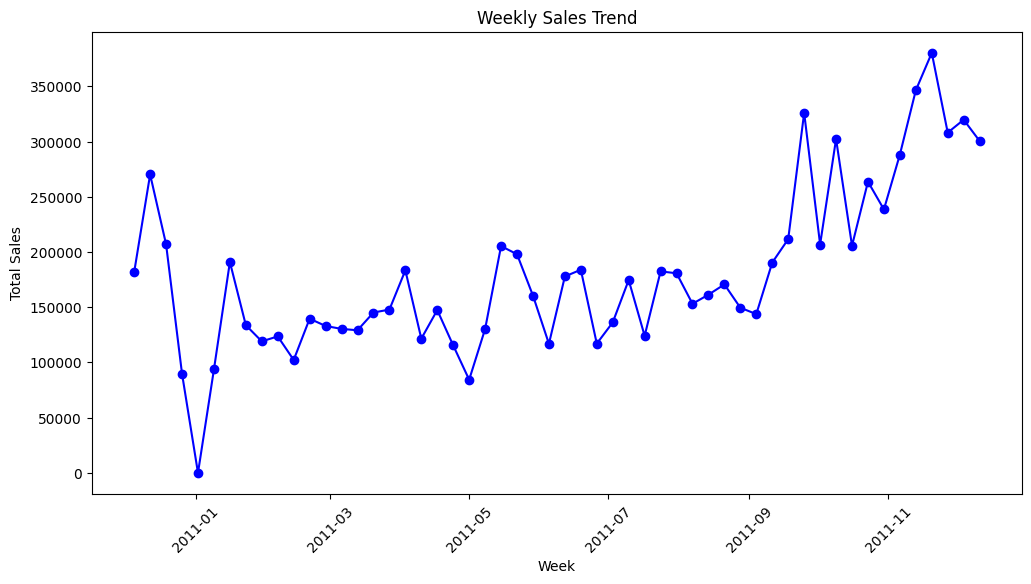

In [36]:
plt.figure(figsize=(12,6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='blue')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.title('Weekly Sales Trend')
plt.xticks(rotation=45)
plt.show()

# Section 2

Advanced Data Visualization 

* Correlation Heatmap (Chat GPT)

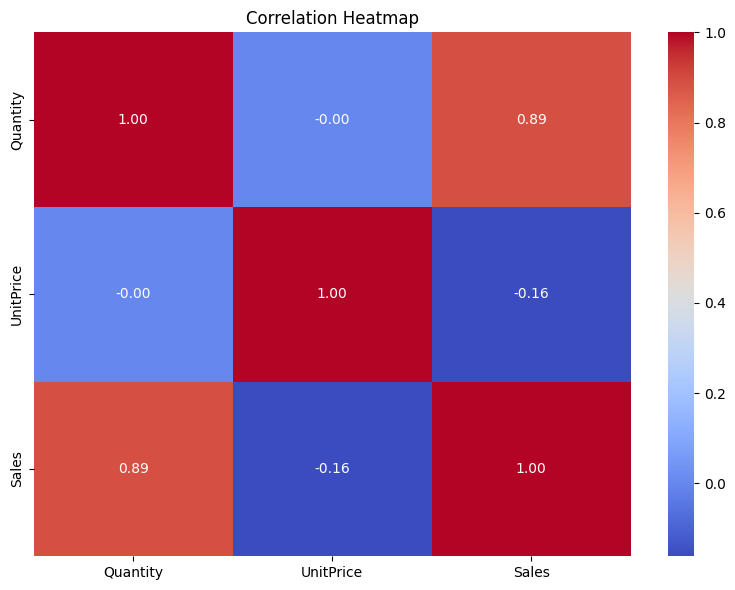

In [37]:
corr = df[['Quantity', 'UnitPrice', 'Sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

C:\Users\tanzi\AppData\Local\Temp\ipykernel_7616\2240483338.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Sales', data=weekday_sales, palette='viridis')


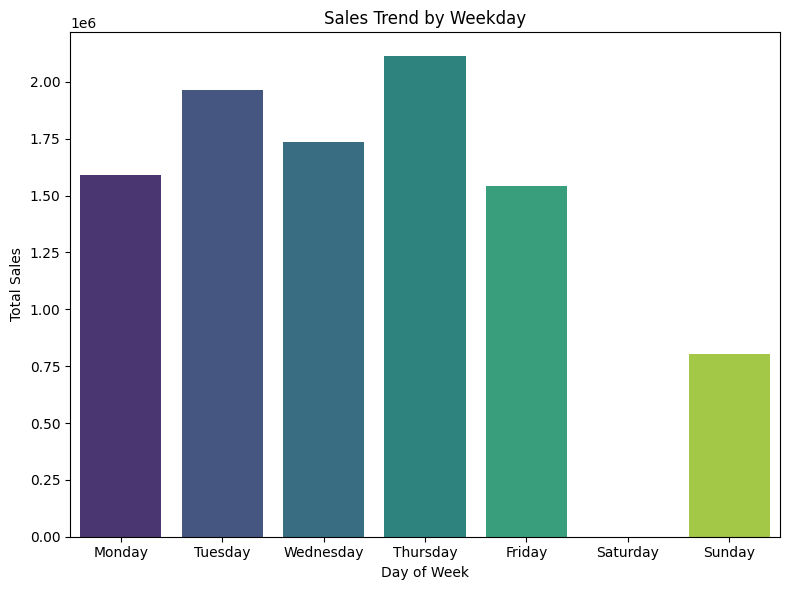

In [40]:


# Group sales by day of week
weekday_sales = df.groupby('Day')['Sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Day', y='Sales', data=weekday_sales, palette='viridis')
plt.title('Sales Trend by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

---

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
